## Introduction

We’re looking to see if there is a correlation of NYC Covid cases rate to keywords found in tweets from verified user in New York City. 

## Twint

In [1]:
#Importing libraries for Twint
import twint
import pandas as pd

import nest_asyncio
nest_asyncio.apply()

### Covid Tweets

Create a function that has the appropriate criteria and parameters to obtain the desire tweets from New York City. Using keywords to feed through the function to obtain the tweets and saving it to a csv file named 'covidtweets.csv'. 
We're also looking for likes count as well for each tweets as a way to give more weight to the words since it is imply that the reader are affected by the tweets.

Six Keywords were used to obtain the tweets are:
- Covid
- Corona
- Coronavirus
- Mask
- Vaccine
- Quarantine

In [2]:
# c = twint.Config()
# def tweetsearch(keyword):
#     c.Search = keyword
#     c.Custom["tweet"] = ["date", "time", "username", "tweet", "likes_count"]
#     c.Geo = "40.730610, -73.935242, 25mi"
#     c.Since = '2020-01-01'
#     c.Until = '2021-02-14'
#     c.Verified = True
#     c.Min_likes = 50
#     c.Count = True
#     c.Limit = 10000
#     c.Store_csv = True
#     c.Output = 'covidtweets.csv'

In [3]:
# tweetsearch('covid')

In [4]:
# twint.run.Search(c)

### Corona Tweets

In [5]:
# tweetsearch('corona')

In [6]:
# twint.run.Search(c)

### Coronavirus Tweets

In [7]:
# tweetsearch('coronavirus')

In [8]:
# twint.run.Search(c)

### Mask Tweets

In [9]:
# tweetsearch('mask')

In [10]:
# twint.run.Search(c)

### Vaccine Tweets

In [11]:
# tweetsearch('vaccine')

In [12]:
# twint.run.Search(c)

### Quarantine Tweets

In [13]:
# tweetsearch('quarantine')

In [14]:
# twint.run.Search(c)

## Basic Cleaning

In [15]:
#Opening the twints dataframe
ctdf = pd.read_csv('covidtweets.csv')

In [16]:
#Quick inspection
ctdf.head()

,date,time,username,tweet,likes_count
0,2021-02-12,18:50:50,paulkrugman,Some guys talking about Covid relief https://...,197
1,2021-02-12,18:49:36,feraljokes,He's conveniently left out of the story that h...,25504
2,2021-02-12,18:41:42,justinbrannan,Day 4 (I think) of COVID. Feels like shoegaze ...,94
3,2021-02-12,18:37:49,nywfp,It is clear that the expanded emergency powers...,54
4,2021-02-12,18:27:37,newsweek,Dr. Fauci says kids could get COVID vaccine by...,87


In [17]:
#The number of rows
ctdf.shape

(3160, 5)

In [18]:
#Checking for duplicated tweets
ctdf.duplicated().value_counts()

False    2788
True      372
dtype: int64

In [19]:
#Dropping all duplicated tweets
ctdf = ctdf.drop_duplicates()

In [20]:
#Confirming that we dropped the duplicates
ctdf.shape

(2788, 5)

In [21]:
#Seeing what kind of a dtype date column is
ctdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2788 entries, 0 to 3159
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         2788 non-null   object
 1   time         2788 non-null   object
 2   username     2788 non-null   object
 3   tweet        2788 non-null   object
 4   likes_count  2788 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 130.7+ KB


In [22]:
#Convert the date column to datetime
ctdf['date'] = pd.to_datetime(ctdf['date'])
ctdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2788 entries, 0 to 3159
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2788 non-null   datetime64[ns]
 1   time         2788 non-null   object        
 2   username     2788 non-null   object        
 3   tweet        2788 non-null   object        
 4   likes_count  2788 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 130.7+ KB


In [23]:
#Sorting all rows by date columns accuracy 
ctdf.sort_values(by=['date'], inplace=True, ascending=True)
ctdf.head()

,date,time,username,tweet,likes_count
2328,2020-01-02,11:25:32,ronnypascale,A year ago today I was traveling around. Inste...,61
2327,2020-01-04,12:57:29,robertjohndavi,From Robert Davi “ The political class has wo...,243
2326,2020-01-10,22:32:03,jameswest2010,Hahahahahahahaha hahahahahahahaha hahahahahaha...,74
1306,2020-01-19,13:09:58,armstronghouse,All of us at the Louis Armstrong House Museum ...,115
1938,2020-01-23,21:31:18,donniedoesworld,Hey guys this will be my official thread of ph...,603


In [24]:
#Dropping the time and username columns as it is not needed for this project
ctdf.drop(['time', 'username'], axis=1, inplace=True)
ctdf.head()

,date,tweet,likes_count
2328,2020-01-02,A year ago today I was traveling around. Inste...,61
2327,2020-01-04,From Robert Davi “ The political class has wo...,243
2326,2020-01-10,Hahahahahahahaha hahahahahahahaha hahahahahaha...,74
1306,2020-01-19,All of us at the Louis Armstrong House Museum ...,115
1938,2020-01-23,Hey guys this will be my official thread of ph...,603


In [25]:
#Taking a peek at a row
ctdf['tweet'].iloc[1236]

'Here’s a fun video by Newark’s own @DJLILMAN973 Ft. our Mayor @rasjbaraka reminding all of Newark to Mask Up. #MaskUpNewark  https://t.co/2BuHyG7KCD'

In [26]:
#Looking to see how many unique days is available to use
ctdf['date'].nunique()

362

## NLP

In [27]:
#Importing all of the libraries for NLP preprocessing
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB

# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')
# nltk.download('words')

In [28]:
##Setting language to english only
# english = set(nltk.corpus.words.words())
# print(len(english))

### Basic Cleaning

In [29]:
#Using regex to remove urls, mentions, hashtags, etc.
import string
import re
def remove_attributes(text):
    text = re.sub(r'http\S+', '', text) #remove urls with http
    text = re.sub(r'\S+\.com\S+', '', text) #remove urls with .com
    text = re.sub(r'\@\w+', '', text) #remove mentions
    text = re.sub(r'#', '', text) #remove hashtag symbols
    text = re.sub(r'\d+', '', text) #remove digits
    text = re.sub(r'[^\w\s]', '', text) #remove punctuations
    return text

In [30]:
#Creating new column with altered tweets
ctdf['remove_attributes'] = ctdf['tweet'].apply(lambda x: remove_attributes(x))
ctdf.head()

,date,tweet,likes_count,remove_attributes
2328,2020-01-02,A year ago today I was traveling around. Inste...,61,A year ago today I was traveling around Instea...
2327,2020-01-04,From Robert Davi “ The political class has wo...,243,From Robert Davi The political class has wor...
2326,2020-01-10,Hahahahahahahaha hahahahahahahaha hahahahahaha...,74,Hahahahahahahaha hahahahahahahaha hahahahahaha...
1306,2020-01-19,All of us at the Louis Armstrong House Museum ...,115,All of us at the Louis Armstrong House Museum ...
1938,2020-01-23,Hey guys this will be my official thread of ph...,603,Hey guys this will be my official thread of ph...


### Tokenization

In [31]:
#Tokenizing the tweets for easier processing
ctdf['tokenized_tweets'] = ctdf.apply(lambda row: 
                nltk.word_tokenize(row['remove_attributes']), axis=1)

#Removing the 'remove_attributes' as it is replaced by the 'tokenized_tweets'
ctdf.drop('remove_attributes', axis=1, inplace=True)

ctdf.head()

,date,tweet,likes_count,tokenized_tweets
2328,2020-01-02,A year ago today I was traveling around. Inste...,61,"[A, year, ago, today, I, was, traveling, aroun..."
2327,2020-01-04,From Robert Davi “ The political class has wo...,243,"[From, Robert, Davi, The, political, class, ha..."
2326,2020-01-10,Hahahahahahahaha hahahahahahahaha hahahahahaha...,74,"[Hahahahahahahaha, hahahahahahahaha, hahahahah..."
1306,2020-01-19,All of us at the Louis Armstrong House Museum ...,115,"[All, of, us, at, the, Louis, Armstrong, House..."
1938,2020-01-23,Hey guys this will be my official thread of ph...,603,"[Hey, guys, this, will, be, my, official, thre..."


In [32]:
#Looking at the changes
ctdf['tokenized_tweets'].iloc[1236]

['Heres',
 'a',
 'fun',
 'video',
 'by',
 'Newarks',
 'own',
 'Ft',
 'our',
 'Mayor',
 'reminding',
 'all',
 'of',
 'Newark',
 'to',
 'Mask',
 'Up',
 'MaskUpNewark']

### Stop Word

In [33]:
#Using NLTK stopwords to remove unnecessary words
stop = stopwords.words('english')

In [34]:
#Creating a new column that includes stopwords and dropping the tokenized
ctdf['stopwords'] = ctdf['tokenized_tweets'].apply(lambda x: ' '.join([word for word in x if word not in (stop)]))

ctdf.drop('tokenized_tweets', axis=1, inplace=True)

ctdf.head()

,date,tweet,likes_count,stopwords
2328,2020-01-02,A year ago today I was traveling around. Inste...,61,A year ago today I traveling around Instead ge...
2327,2020-01-04,From Robert Davi “ The political class has wo...,243,From Robert Davi The political class worn mask...
2326,2020-01-10,Hahahahahahahaha hahahahahahahaha hahahahahaha...,74,Hahahahahahahaha hahahahahahahaha hahahahahaha...
1306,2020-01-19,All of us at the Louis Armstrong House Museum ...,115,All us Louis Armstrong House Museum saddened h...
1938,2020-01-23,Hey guys this will be my official thread of ph...,603,Hey guys official thread photos vids updates I...


In [35]:
#Seeing if some words has been removed
ctdf['stopwords'].iloc[1236]

'Heres fun video Newarks Ft Mayor reminding Newark Mask Up MaskUpNewark'

### Lemmatization

In [36]:
#Importing and creatinga function to lemmatize the tweets
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

#Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()


def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [37]:
#New column to include the lemmatize words
ctdf['cleaned_tweets'] =  ctdf['stopwords'].apply(lambda x: ' '.join(
    [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in nltk.word_tokenize(x)]))

#Dropping the rest of columns that contains tweets without lemmatization
ctdf.drop(['tweet', 'stopwords'], axis=1, inplace=True)

ctdf.head(20)

,date,likes_count,cleaned_tweets
2328,2020-01-02,61,A year ago today I travel around Instead get h...
2327,2020-01-04,243,From Robert Davi The political class worn mask...
2326,2020-01-10,74,Hahahahahahahaha hahahahahahahaha hahahahahaha...
1306,2020-01-19,115,All u Louis Armstrong House Museum sadden hear...
1938,2020-01-23,603,Hey guy official thread photo vids update Im g...
1937,2020-01-23,313,The coronavirus tiktoks start roll
2325,2020-01-24,1366,The great thing Joe Rogan controversy rip mask...
2324,2020-01-25,168,Everybody NYC subway rockin surgical mask This...
2323,2020-01-27,454,Masks stock crowd people Jiangxi China gather ...
1935,2020-01-28,454,Hey coronavirus Catch ya sucka


In [38]:
ctdf['cleaned_tweets'].iloc[1236]

'Heres fun video Newarks Ft Mayor remind Newark Mask Up MaskUpNewark'

### Dates

In [39]:
#Changing the date column to datetime formate for ease of 
#concatenating with another dataset
ctdf['date'] = pd.to_datetime(ctdf['date'])
ctdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2788 entries, 2328 to 0
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            2788 non-null   datetime64[ns]
 1   likes_count     2788 non-null   int64         
 2   cleaned_tweets  2788 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 87.1+ KB


In [40]:
#Reseting the index so the rows are properly counted in order
ctdf.reset_index(drop = True, inplace = True)
ctdf.head()

,date,likes_count,cleaned_tweets
0,2020-01-02,61,A year ago today I travel around Instead get h...
1,2020-01-04,243,From Robert Davi The political class worn mask...
2,2020-01-10,74,Hahahahahahahaha hahahahahahahaha hahahahahaha...
3,2020-01-19,115,All u Louis Armstrong House Museum sadden hear...
4,2020-01-23,603,Hey guy official thread photo vids update Im g...


>Now we'll need to offset the date of the week by moving it 2 weeks in advance to match the likelihood day of getting new Covid cases. Since it takes about 2 weeks for Covid  symptom to show

In [41]:
#Offsetting the covid tweets to match the covid cases that could happen 2 weeks later
from pandas.tseries.offsets import DateOffset

ctdf['date'] = ctdf['date'] + DateOffset(weeks=2)
ctdf

,date,likes_count,cleaned_tweets
0,2020-01-16,61,A year ago today I travel around Instead get h...
1,2020-01-18,243,From Robert Davi The political class worn mask...
2,2020-01-24,74,Hahahahahahahaha hahahahahahahaha hahahahahaha...
3,2020-02-02,115,All u Louis Armstrong House Museum sadden hear...
4,2020-02-06,603,Hey guy official thread photo vids update Im g...
...,...,...,...
2783,2021-02-26,122,The delivery date census data use redistrictin...
2784,2021-02-26,455,Breaking News The FDA say told Moderna put cor...
2785,2021-02-26,236,South African Archbishop Denounces Coronavirus...
2786,2021-02-26,188,Former President Donald Trumps coronavirus inf...


In [42]:
#Changing the date column name to 'd_date' to avoid future conflict with
#count vectorizer
ctdf['d_date'] = ctdf['date']
ctdf.drop('date', axis=1, inplace=True)

In [43]:
#Dropping the first few rows to accurately match the covid cases starting date
ctdf = ctdf.drop(range(25))
ctdf.head()

,likes_count,cleaned_tweets,d_date
25,152,Morning update Coronavirus stay healthy MAHA W...,2020-03-02
26,1206,Coronavirus real Just try excersize hot tea fe...,2020-03-03
27,167,Corona chill,2020-03-06
28,99,Always nice give antivaccine movement platform,2020-03-08
29,74,Corona virus serious pandemic fear increasingl...,2020-03-10


In [44]:
#Reseting index number for an accurate future concat
ctdf.reset_index(drop = True, inplace = True)
ctdf.head()

,likes_count,cleaned_tweets,d_date
0,152,Morning update Coronavirus stay healthy MAHA W...,2020-03-02
1,1206,Coronavirus real Just try excersize hot tea fe...,2020-03-03
2,167,Corona chill,2020-03-06
3,99,Always nice give antivaccine movement platform,2020-03-08
4,74,Corona virus serious pandemic fear increasingl...,2020-03-10


### Like Count DF

In [45]:
#Making a copy of the dataset as a test to try out if 'likes_count' have a factor
likedf = ctdf.copy()
likedf

,likes_count,cleaned_tweets,d_date
0,152,Morning update Coronavirus stay healthy MAHA W...,2020-03-02
1,1206,Coronavirus real Just try excersize hot tea fe...,2020-03-03
2,167,Corona chill,2020-03-06
3,99,Always nice give antivaccine movement platform,2020-03-08
4,74,Corona virus serious pandemic fear increasingl...,2020-03-10
...,...,...,...
2758,122,The delivery date census data use redistrictin...,2021-02-26
2759,455,Breaking News The FDA say told Moderna put cor...,2021-02-26
2760,236,South African Archbishop Denounces Coronavirus...,2021-02-26
2761,188,Former President Donald Trumps coronavirus inf...,2021-02-26


In [46]:
likedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2763 entries, 0 to 2762
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   likes_count     2763 non-null   int64         
 1   cleaned_tweets  2763 non-null   object        
 2   d_date          2763 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 64.9+ KB


## NYC Cases Dataset

The New York City Covid Cases was obtain through the New York Times' Github page (https://github.com/nytimes/covid-19-data) where they update nationwide Covid-19 information daily. This dataset has been modify so it only have date, cases, and deaths only in New York City.

In [47]:
nyc = pd.read_csv('nyccases.csv')
nyc

,date,new_cases,new_deaths
0,2020-03-01,NaN,NaN
1,2020-03-02,0.0,0.0
2,2020-03-03,1.0,0.0
3,2020-03-04,0.0,0.0
4,2020-03-05,2.0,0.0
...,...,...,...
362,2021-02-26,4289.0,85.0
363,2021-02-27,4273.0,80.0
364,2021-02-28,4204.0,79.0
365,2021-03-01,3704.0,76.0


In [48]:
#Dropping cases starting on 02/27/21 due to no available tweets for those dates
nyc = nyc.drop(range(363, 367))
nyc.tail()

,date,new_cases,new_deaths
358,2021-02-22,3509.0,64.0
359,2021-02-23,3801.0,66.0
360,2021-02-24,3313.0,71.0
361,2021-02-25,4460.0,63.0
362,2021-02-26,4289.0,85.0


In [49]:
nyc.shape

(363, 3)

In [50]:
#Convert 'date' column type to datetime to match the tweets dataset date column
nyc['d_date'] = pd.to_datetime(nyc['date'])
nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 362
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        363 non-null    object        
 1   new_cases   362 non-null    float64       
 2   new_deaths  362 non-null    float64       
 3   d_date      363 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 14.2+ KB


In [51]:
#Removing the original date column as it is not needed anymore and removing
#new_deaths column because we're not interested in it as of now
nyc.drop(['date', 'new_deaths'], axis=1, inplace=True)
nyc.head()

,new_cases,d_date
0,NaN,2020-03-01
1,0.0,2020-03-02
2,1.0,2020-03-03
3,0.0,2020-03-04
4,2.0,2020-03-05


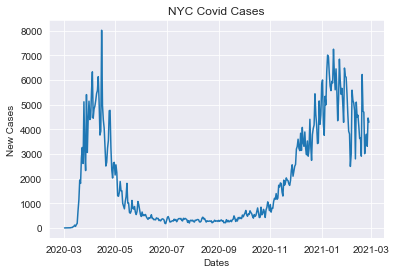

In [52]:
#Quick EDA of New Cases
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="darkgrid")

line = sns.lineplot(data=nyc, x="d_date", y="new_cases")
line.set(xlabel='Dates', ylabel='New Cases', title='NYC Covid Cases')
plt.show()

In [53]:
#Setting the 'd_date' column to be the index
nyc.set_index('d_date', inplace=True, drop=True)

## Features

### Count Vectorizer

In [54]:
#Tokenization and creating a count vectorizer to alter the orginial dataset
from nltk.tokenize import RegexpTokenizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize,
                    min_df = 3)
text_counts= cv.fit_transform(ctdf['cleaned_tweets'])

In [55]:
#Looking at the type
type(text_counts)

scipy.sparse.csr.csr_matrix

In [56]:
#New word count dataframe
cdf = pd.DataFrame(text_counts.todense(),columns = cv.get_feature_names())
cdf

,abcny,ability,able,abroad,absolute,absolutely,absurd,accept,acceptable,access,...,youll,young,youre,youtube,youve,yr,zacha,zealand,zero,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#Looking what are some words kept
cdf.columns

Index(['abcny', 'ability', 'able', 'abroad', 'absolute', 'absolutely',
       'absurd', 'accept', 'acceptable', 'access',
       ...
       'youll', 'young', 'youre', 'youtube', 'youve', 'yr', 'zacha', 'zealand',
       'zero', 'zoom'],
      dtype='object', length=2443)

In [58]:
#Seeing if there is different values in each word
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(ctdf['cleaned_tweets'])
text_tf.data

array([0.32550302, 0.21012092, 0.14071783, ..., 0.45713728, 0.5158315 ,
       0.15811827])

#### Concat NYC Dataset

In [59]:
tweetdf = pd.concat([ctdf['d_date'], cdf], axis=1)
tweetdf

,d_date,abcny,ability,able,abroad,absolute,absolutely,absurd,accept,acceptable,...,youll,young,youre,youtube,youve,yr,zacha,zealand,zero,zoom
0,2020-03-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-06,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-03-10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2758,2021-02-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2759,2021-02-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2760,2021-02-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2761,2021-02-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
tweetdf = tweetdf.groupby(pd.Grouper(key="d_date")).sum()
tweetdf.shape

(342, 2443)

In [61]:
tweet_df = pd.merge(nyc, tweetdf, how='inner', left_index=True, right_index=True)
tweet_df.shape

(342, 2444)

In [62]:
tweet_df

,new_cases,abcny,ability,able,abroad,absolute,absolutely,absurd,accept,acceptable,...,youll,young,youre,youtube,youve,yr,zacha,zealand,zero,zoom
d_date,,,,,,,,,,,,,,,,,,,,,
2020-03-02,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-03,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-06,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-08,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-10,17.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-22,3509.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-02-23,3801.0,0,1,2,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,0
2021-02-24,3313.0,0,1,0,0,2,0,0,2,1,...,0,4,7,0,1,2,2,1,2,2


### Like Count Cases

In [63]:
like_text_counts= cv.fit_transform(likedf['cleaned_tweets'])

In [64]:
type(like_text_counts)

scipy.sparse.csr.csr_matrix

In [65]:
like_df = pd.DataFrame(like_text_counts.todense(),columns = cv.get_feature_names())
like_df

,abcny,ability,able,abroad,absolute,absolutely,absurd,accept,acceptable,access,...,youll,young,youre,youtube,youve,yr,zacha,zealand,zero,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2758,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2759,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
like_df.columns

Index(['abcny', 'ability', 'able', 'abroad', 'absolute', 'absolutely',
       'absurd', 'accept', 'acceptable', 'access',
       ...
       'youll', 'young', 'youre', 'youtube', 'youve', 'yr', 'zacha', 'zealand',
       'zero', 'zoom'],
      dtype='object', length=2443)

In [67]:
copytext_tf= tf.fit_transform(likedf['cleaned_tweets'])
copytext_tf.data

array([0.32550302, 0.21012092, 0.14071783, ..., 0.45713728, 0.5158315 ,
       0.15811827])

#### Weighting the Likes

In [68]:
like_count_df = pd.concat([likedf['likes_count'], like_df], axis=1)
like_count_df

,likes_count,abcny,ability,able,abroad,absolute,absolutely,absurd,accept,acceptable,...,youll,young,youre,youtube,youve,yr,zacha,zealand,zero,zoom
0,152,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1206,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,167,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,99,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2758,122,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2759,455,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2760,236,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2761,188,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
#Multiply the counted words by the likes in each individual rows
like_count_df = like_count_df.apply(lambda row: row*row['likes_count'], axis=1)

In [70]:
#Dropping the 'likes_count' column as we do not need it for modeling
like_count_df.drop('likes_count', axis=1, inplace=True)
like_count_df.head()

,abcny,ability,able,abroad,absolute,absolutely,absurd,accept,acceptable,access,...,youll,young,youre,youtube,youve,yr,zacha,zealand,zero,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Concat NYC Dataset

In [71]:
lcdf = pd.concat([likedf['d_date'], like_count_df], axis=1)

In [72]:
lcdf = lcdf.groupby(pd.Grouper(key="d_date")).sum()

In [73]:
lcdf.shape

(342, 2443)

In [74]:
lcdf = pd.merge(nyc, lcdf, how='inner', left_index=True, right_index=True)

In [75]:
lcdf.shape

(342, 2444)

In [76]:
lcdf

,new_cases,abcny,ability,able,abroad,absolute,absolutely,absurd,accept,acceptable,...,youll,young,youre,youtube,youve,yr,zacha,zealand,zero,zoom
d_date,,,,,,,,,,,,,,,,,,,,,
2020-03-02,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-03,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-06,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-08,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-10,17.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-22,3509.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-02-23,3801.0,0,124,384,0,0,1099,1099,0,0,...,0,188,0,0,61,0,0,0,0,0
2021-02-24,3313.0,0,69,0,0,603,0,0,237,333,...,0,514,11135,0,298,279,292,192,308,219


## Modeling

### Train Test Split

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
#Train test split for the original data
X = tweet_df.drop(columns=['new_cases'], axis = 1)
y = tweet_df['new_cases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, 
                                                    random_state = 42)
   

In [79]:
#Train test split for the likes count weighted data
L = lcdf.drop(columns=['new_cases'], axis = 1)
c = lcdf['new_cases']

LX_train, LX_test, cy_train, cy_test = train_test_split(L, c, test_size = 0.3, 
                                                    random_state = 42)
   

### Baseline Decision Tree Regression

#### Original Dataset

In [80]:
#Import the necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

#Instantiating
dtr = DecisionTreeRegressor(random_state=12)
cross_val_score(dtr, X_train, y_train, cv=10)

array([-0.15706501, -0.99216165, -1.37733423, -0.10193522, -0.62579469,
       -0.1492962 , -0.4794413 , -0.4956785 , -1.59468497, -0.45532961])

In [81]:
#Fitting
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=12, splitter='best')

In [82]:
dtr.feature_importances_

array([0., 0., 0., ..., 0., 0., 0.])

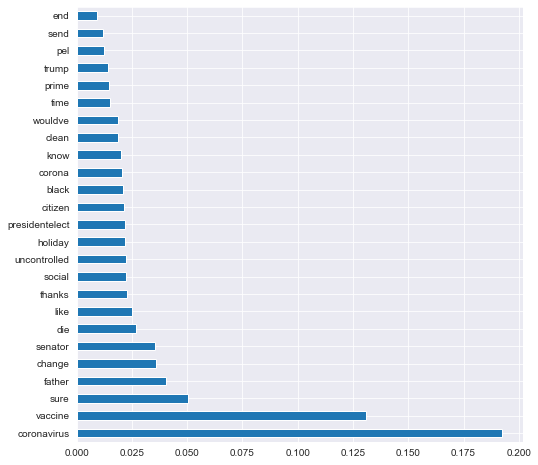

In [83]:
#Make a function to quickly graph feature importances
def plot_important_features(model):
    important_features = pd.Series(data=model.feature_importances_, 
                                   index=X_train.columns)
    important_features.sort_values(ascending=False,inplace=True)
    important_features.iloc[0:25].plot(kind='barh', figsize=(8,8))


plot_important_features(dtr)

In [84]:
import math

def metrics_score(model, X_train, y_train, X_test, y_test):
    tr2 = model.score(X_train, y_train)
    ttr2 = model.score(X_test, y_test)
    mp = model.predict(X_test)
    tp = model.predict(X_train)
    tmse = math.sqrt(mean_squared_error(tp, y_train))
    rmse = math.sqrt(mean_squared_error(mp, y_test))
    
    
    print("Training R2:", round(tr2, 2))
    print("Testing R2:", round(ttr2, 2))
    print("Train RMSE:", round(tmse, 2))
    print("Test RMSE:", round(rmse, 2))
    return

In [85]:
metrics_score(dtr, X_train, y_train, X_test, y_test)

Training R2: 1.0
Testing R2: -0.2
Train RMSE: 0.0
Test RMSE: 2061.65


#### Likes Dataset

In [86]:
#Instantiating
ldtr = DecisionTreeRegressor(random_state=12)
cross_val_score(ldtr, LX_train, cy_train, cv=10)

array([ 0.53620076, -0.39173549, -0.42092695, -0.26826164, -0.88769685,
        0.04501156,  0.12268232, -0.45734228, -0.68665526, -0.59215579])

In [87]:
#Fitting
ldtr.fit(LX_train, cy_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=12, splitter='best')

In [88]:
#Features Importances
ldtr.feature_importances_

array([7.71924667e-09, 0.00000000e+00, 0.00000000e+00, ...,
       1.35521024e-06, 0.00000000e+00, 0.00000000e+00])

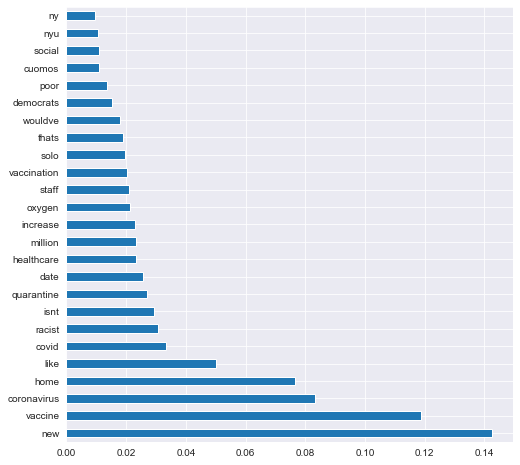

In [89]:
plot_important_features(ldtr)

In [90]:
metrics_score(ldtr, LX_train, cy_train, LX_test, cy_test)

Training R2: 1.0
Testing R2: -0.63
Train RMSE: 0.0
Test RMSE: 2397.97


### Random Forest Regressor

In [91]:
#Importing
from sklearn.ensemble import RandomForestRegressor

#Instantiating
rfr = RandomForestRegressor(max_depth=2, random_state=12)
cross_val_score(rfr, X_train, y_train, cv=10)

array([0.28020656, 0.09893961, 0.04660872, 0.040104  , 0.29021999,
       0.28910224, 0.13320481, 0.06444247, 0.1386767 , 0.21168849])

In [92]:
#Fitting
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=12, verbose=0, warm_start=False)

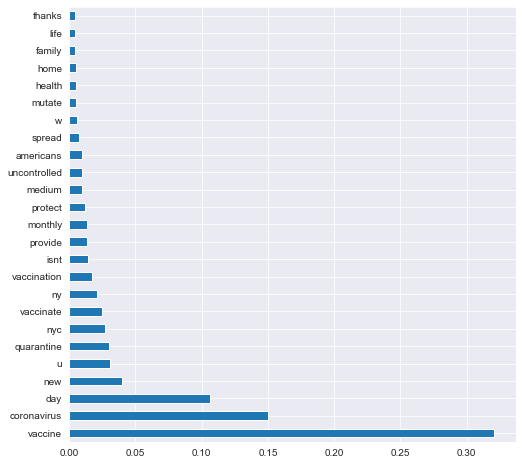

In [93]:
plot_important_features(rfr)

In [94]:
metrics_score(rfr, X_train, y_train, X_test, y_test)

Training R2: 0.38
Testing R2: 0.3
Train RMSE: 1645.88
Test RMSE: 1576.34


#### Likes Dataset

In [95]:
#Instantiating
lrfr = RandomForestRegressor(max_depth=2, random_state=12)
cross_val_score(lrfr, LX_train, cy_train, cv=10)

array([0.31634903, 0.04718791, 0.04219846, 0.03827189, 0.1671931 ,
       0.27012677, 0.10691966, 0.00554458, 0.25179907, 0.06473786])

In [96]:
#Fitting
lrfr.fit(LX_train, cy_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=12, verbose=0, warm_start=False)

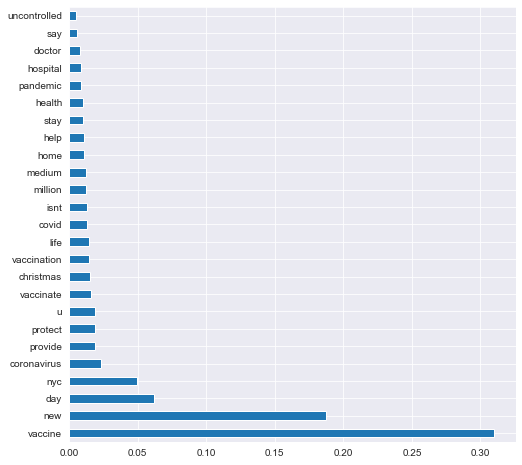

In [97]:
plot_important_features(lrfr)

In [98]:
metrics_score(lrfr, LX_train, cy_train, LX_test, cy_test)

Training R2: 0.38
Testing R2: 0.24
Train RMSE: 1643.96
Test RMSE: 1642.02


## Final Models using GridSearch

### Original Dataset

In [99]:
#Importing GridSearch
from sklearn.model_selection import GridSearchCV, cross_val_score

In [100]:
#Instantiating RandomForestRegessor
rfrg = RandomForestRegressor()

#Fitting the Forest
rfrg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [101]:
#Cross Validation Score
rfrg_cv_score = np.mean(cross_val_score(rfrg, X_train, y_train, cv=3))

# print(f"Mean Cross Validation Score for Random Forest Regressor: {rfrg_cv_score :.2%}")

In [102]:
#Creating potential parameters for GridSearch
rfrg_param_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['mae', 'mse'],
                  'max_depth': [2, 4, 8, 10, 15, 25],
                  'min_samples_split': [4, 6, 8, 10, 12],
                  'min_samples_leaf': [3, 4, 5, 6, 7, 8]}

In [103]:
num_forest_trees = 4 * 2 * 6 * 5 * 6 * 5
print(f"Grid Search will have to search through {num_forest_trees} different permutations.")

Grid Search will have to search through 7200 different permutations.


In [104]:
# rfrg_search = GridSearchCV(rfrg, rfrg_param_grid, cv = 3)
# rfrg_search.fit(X_train, y_train)

# print(f"Training Accuracy: {rfrg_search.best_score_ :.2%}")
# print("")
# print(f"Optimal Parameters: {rfrg_search.best_params_}")

Training Accuracy: 29.74%

Optimal Parameters: {'criterion': 'mse', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 12, 'n_estimators': 25}

#### RFR GridSearch Params

In [105]:
#Param recommednation for original
gs_rfrg = RandomForestRegressor(criterion = 'mse', max_depth = 10, 
                               min_samples_leaf = 5, min_samples_split = 12,
                               n_estimators = 25, random_state = 12)


In [106]:
#Fitting the Forest
gs_rfrg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=12, min_weight_fraction_leaf=0.0,
                      n_estimators=25, n_jobs=None, oob_score=False,
                      random_state=12, verbose=0, warm_start=False)

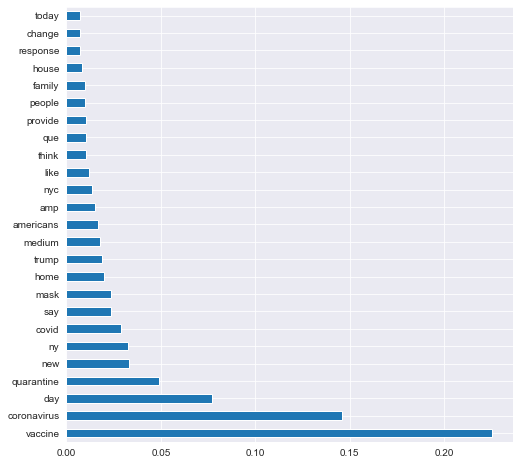

In [107]:
plot_important_features(gs_rfrg)

In [108]:
metrics_score(gs_rfrg, X_train, y_train, X_test, y_test)

Training R2: 0.61
Testing R2: 0.31
Train RMSE: 1293.21
Test RMSE: 1562.39


### Likes Dataset

In [109]:
#Instantiating RandomForestRegessor
lrfrg = RandomForestRegressor()

#Fitting the Forest
lrfrg.fit(LX_train, cy_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [110]:
#Cross Validation Score
lrfrg_cv_score = np.mean(cross_val_score(lrfrg, LX_train, cy_train, cv=3))

# print(f"Mean Cross Validation Score for Random Forest Regressor: {lrfrg_cv_score :.2%}")

In [111]:
#Creating potential parameters for GridSearch
lrfrg_param_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['mae', 'mse'],
                  'max_depth': [2, 4, 8, 10, 15, 25],
                  'min_samples_split': [4, 6, 8, 10, 12],
                  'min_samples_leaf': [3, 4, 5, 6, 7, 8]}

In [112]:
num_forest_trees = 4 * 2 * 6 * 5 * 6 * 5
print(f"Grid Search will have to search through {num_forest_trees} different permutations.")

Grid Search will have to search through 7200 different permutations.


In [113]:
# lrfrg_search = GridSearchCV(lrfrg, lrfrg_param_grid, cv = 3)
# lrfrg_search.fit(LX_train, cy_train)

# print(f"Training Accuracy: {lrfrg_search.best_score_ :.2%}")
# print("")
# print(f"Optimal Parameters: {lrfrg_search.best_params_}")

Training Accuracy: 26.60%

Optimal Parameters: {'criterion': 'mse', 'max_depth': 4, 'min_samples_leaf': 7, 'min_samples_split': 10, 'n_estimators': 10}

#### RFR GridSearch Params

In [114]:
#Using likes as a factor
gs_lrfrg = RandomForestRegressor(criterion = 'mse', max_depth = 4, 
                               min_samples_leaf = 7, min_samples_split = 10,
                               n_estimators = 10, random_state = 12)

In [115]:
#Fitting the Forest
gs_lrfrg.fit(LX_train, cy_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=7,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=12, verbose=0, warm_start=False)

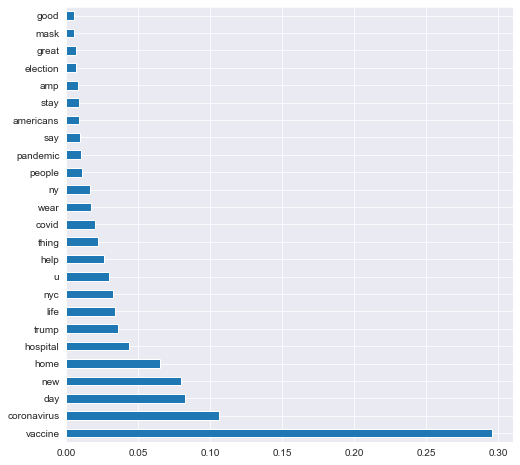

In [116]:
plot_important_features(gs_lrfrg)

In [117]:
metrics_score(gs_lrfrg, LX_train, cy_train, LX_test, cy_test)

Training R2: 0.52
Testing R2: 0.27
Train RMSE: 1437.65
Test RMSE: 1606.66


### Post EDAs

In [149]:
#Create a function to quickly plot graphs
def regplot(keyword):
    fig, ax = plt.subplots()
    fig.set_size_inches(10,6)
    reg = sns.regplot(x = keyword, y = 'new_cases', data=tweet_df, 
            line_kws={"color": "orange"})
    reg.set(xlabel=keyword.title(), ylabel='New Cases', 
            title='Important Word Trend')
    return plt.show()

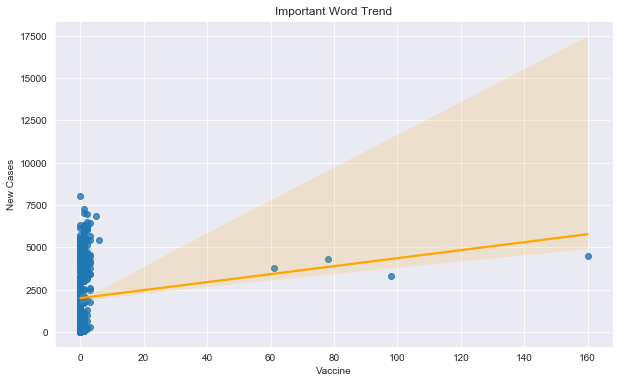

In [150]:
regplot('vaccine')

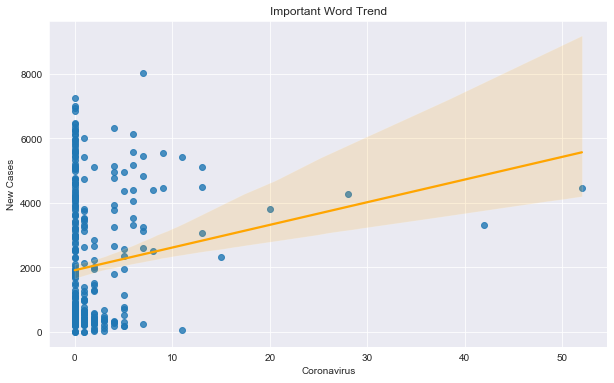

In [151]:
regplot('coronavirus')

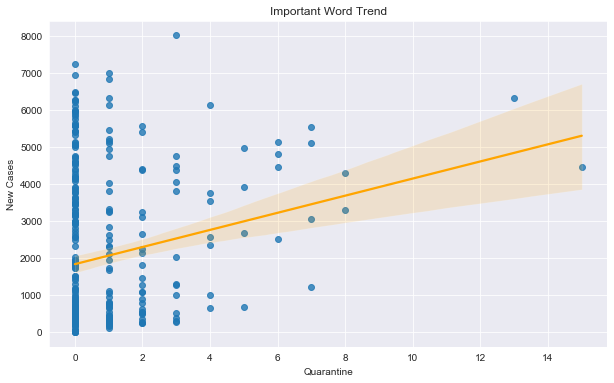

In [152]:
regplot('quarantine')

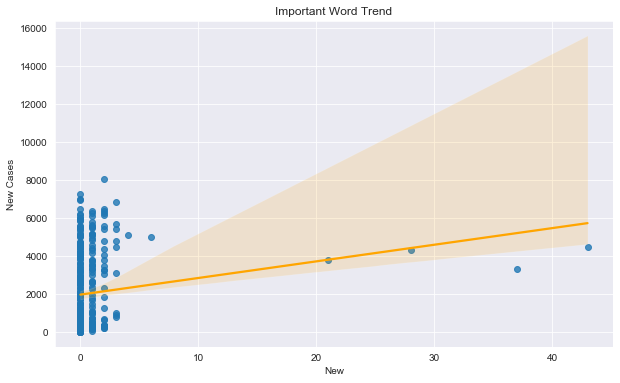

In [153]:
regplot('new')

## Conclusion

After using Random Forest Regressor models for both original dataset(not weighted by likes) and the likes dataset here are the result for both of them.

Original: 
- Training R2: 0.61
- Test R2: 0.28
- Train RMSE: 1308.28
- Test RMSE: 1593.89

Likes:
- Training R2: 0.52
- Testing R2: 0.27
- Train RMSE: 1437.65
- Test RMSE: 1606.66

As we can see above, the original model preform better than have the weighted likes count model. Taking a look at the features importance graphs you can see some words that stands out a little more than other. At the same time it is reasonable to see some health based words and politic based words can affect the case rate in New York City. The recommendation base on the current results would be to have verified user to be careful with their tweets as they  can influence the behavior of their followers.

However, these model needs further work done in order to be more accurate and have a better representation of words to cases. Some future work may involve:
- Obtain more tweets
- More NLP cleaning by including more stopwords
- Give the GridSearch more parameters to look through for a better fit
- Shorten the tweets capture window to get a more of a snapshot

